In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro, normaltest, jarque_bera

In [2]:
#load mtcars dataset
df=sns.load_dataset('mpg').dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Imperical rule for normal distribution is defined as follows:
- 68% of data falls within 1 standard deviation of the mean
- 95% of data falls within 2 standard deviations of the mean
- 99.7% of data falls within 3 standard deviations of the mean

In [5]:
col="mpg"
data=df[col] #.values
mean,std= data.mean(), data.std()
print('mean-',mean)
print('std-',std)

mean- 23.445918367346938
std- 7.805007486571799


In [6]:
#Range of 1 std from mean
#mean+std
print('mean+std-',mean+std)
#mean-std
print('mean-std-',mean-std)

mean+std- 31.250925853918737
mean-std- 15.640910880775138


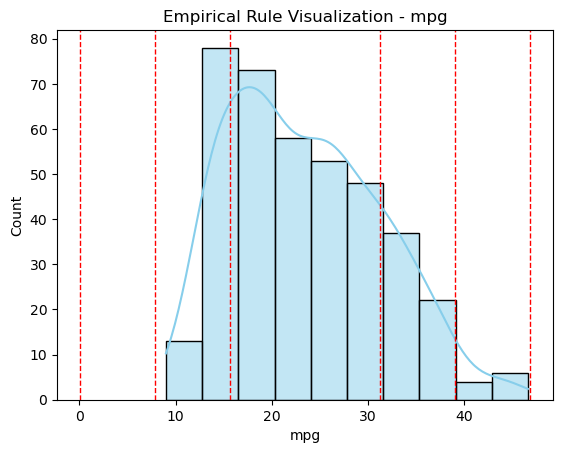

In [7]:
#Histogram
sns.histplot(data, kde=True, bins=10, color='skyblue')
#plt.hist(data, bins=10, color='blue', alpha=0.7)
for i in range(1,4):
    plt.axvline(mean+i*std, color='red', linestyle='dashed', linewidth=1)
    plt.axvline(mean-i*std, color='red', linestyle='dashed', linewidth=1)
plt.title(f'Empirical Rule Visualization - {col}')
plt.show() 

In [8]:
#skewness
print('Skewness:', skew(data))
#kurtosis
print('Kurtosis:', kurtosis(data))

Skewness: 0.45534138282810366
Kurtosis: -0.52470258338766


horsepower Skewness: 1.08


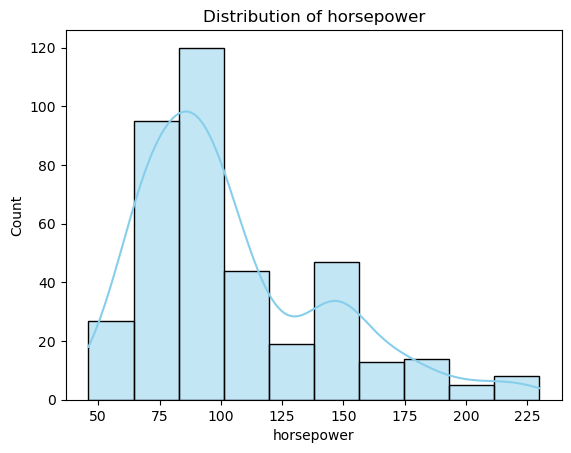

weight Skewness: 0.52


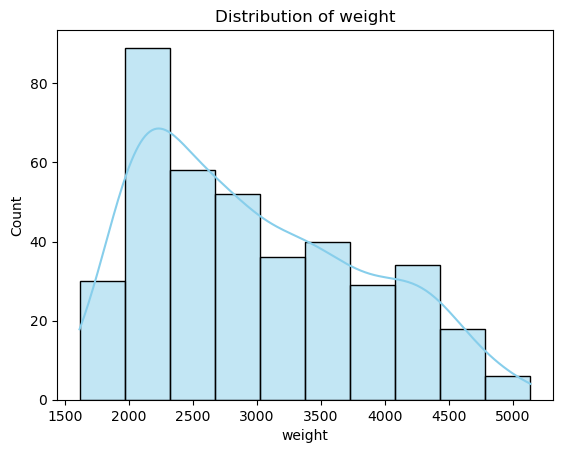

mpg Skewness: 0.46


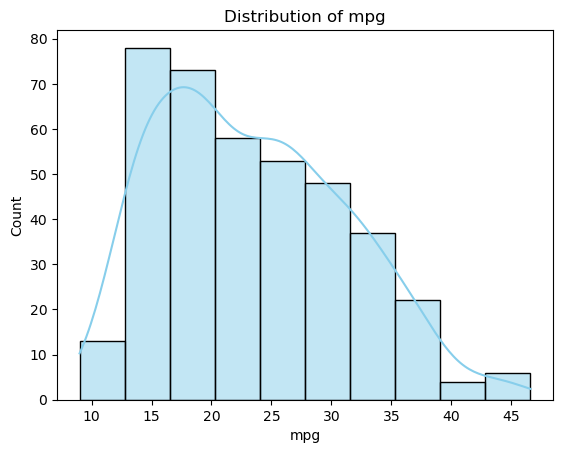

In [9]:
for col in ['horsepower','weight','mpg']:
    print(f"{col} Skewness: {skew(df[col]):.2f}")
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

- Skewness- to check the symmetry of the data
- Kurtosis- to check the peakedness of the data and flatness of the data 
- Differences between heavytails and lightails: - heavytails have more outliers than lightails, 
                                                - lightails have less outliers than heavytails, 
                                                - heavytails have more extreme values than lightails, 
                                                - lightails have less extreme values than heavytails


Kurtosis-
- kurtosis ~ 3: Mesokurtic, kurtosis similar to normal distribution
- kurtosis > 3: Leptokurtic, sharper peak and flatter tails
- kurtosis < 3: Platykurtic, flatter peak and thinner tails

horsepower Kurtosis: 0.67


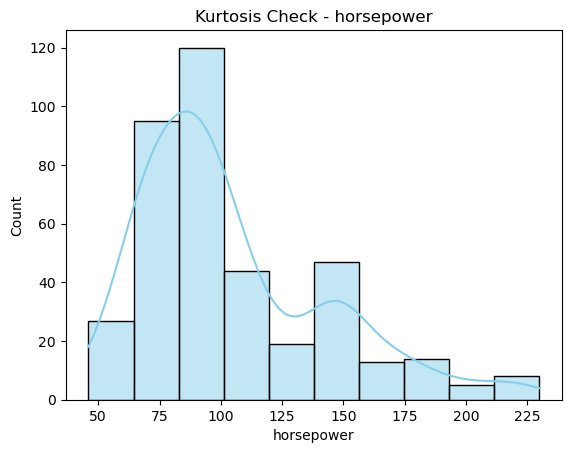

weight Kurtosis: -0.81


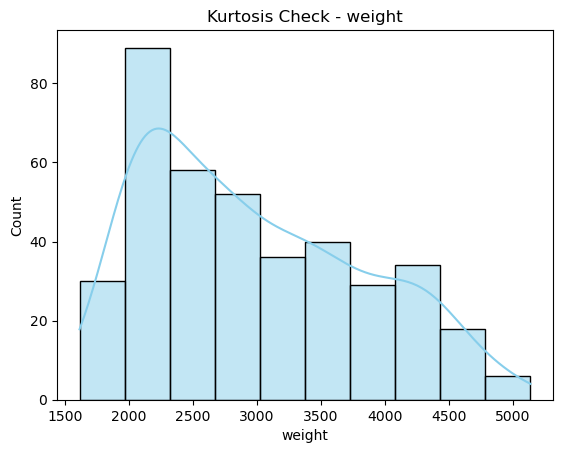

mpg Kurtosis: -0.52


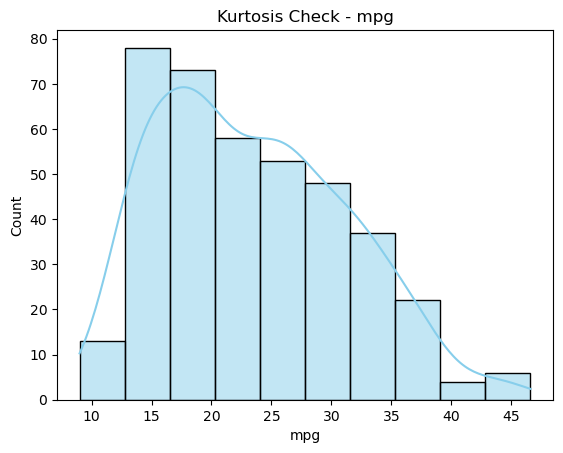

In [10]:
for col in ['horsepower','weight','mpg']:
    print(f"{col} Kurtosis: {kurtosis(df[col]):.2f}")
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Kurtosis Check - {col}')
    plt.show()
#horsepwer is highly skewed and has high kurtosis
#weight is moderately skewed and has moderate kurtosis
#mpg is moderately skewed and has moderate kurtosis

In [11]:
#null hypothesis: data is normally distributed
#alternative hypothesis: data is not normally distributed

In [14]:
col='mpg'
data=df[col]

#sharpiro-wilk test
start,p=shapiro(data)
print(f"Sharpiro-Wilk Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

#D'Agostino's K-squared test
stat,p=normaltest(data)
print(f"D'Agostino's K-squared Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

#Jarque-Bera test
stat,p=jarque_bera(data)
print(f"Jarque-Bera Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

Sharpiro-Wilk Test: 0.0000 -> Not Normal
D'Agostino's K-squared Test: 0.0000 -> Not Normal
Jarque-Bera Test: 0.0001 -> Not Normal


In [15]:
col='acceleration'
data=df[col]

#sharpiro-wilk test
start,p=shapiro(data)
print(f"Sharpiro-Wilk Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

#D'Agostino's K-squared test
stat,p=normaltest(data)
print(f"D'Agostino's K-squared Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

#Jarque-Bera test
stat,p=jarque_bera(data)
print(f"Jarque-Bera Test: {p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

Sharpiro-Wilk Test: 0.0305 -> Not Normal
D'Agostino's K-squared Test: 0.0165 -> Not Normal
Jarque-Bera Test: 0.0147 -> Not Normal


Log Transformation -
- log applied for the data, if data is right skewed.
- Applicable only for positive values

Square root Transformation -
- It is applied when the data has moderate right skewness
- It can't handle positive values and zero also.

Cube root Transformation -
- It can handle both positively and negatively skewed data.
- May accept positive and negative values

Box-Cox Transformation -
- Uses both power and log transformations but the data must be strictly positive.
- It is very sensitive to the outliers.

Yeo-Johnson Transformation -
- Extension of box-cox transformation
- It can handle both positive, negative and zero values.

In [25]:
col='acceleration'
data=df[col]
#different normality tests may give different results on the same data.
transformations={
    'original': data,
    'log': np.log(data),
    'sqrt': np.sqrt(data),
    'Cube Root': np.cbrt(data),
    'box-cox': None,  #Box-Cox requires
    'yeo-jhonson': None
}

#box-cox (only if data>0)
from scipy.stats import boxcox, yeojohnson
if(data>0).all():
    transformations['Box-Cox'],_=boxcox(data)

#yeo-jhonson (safe for negatives/zeros)
transformations['Yeo-Jhonson'],_=yeojohnson(data)

#Test shapiro after transformations
for name,tdata in transformations.items():
    if tdata is not None:
        start,p=shapiro(tdata)
        print(f"{name:<12} -> Shapiro p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

original     -> Shapiro p=0.0305 -> Not Normal
log          -> Shapiro p=0.0065 -> Not Normal
sqrt         -> Shapiro p=0.3679 -> Normal
Cube Root    -> Shapiro p=0.2110 -> Normal
Box-Cox      -> Shapiro p=0.3798 -> Normal
Yeo-Jhonson  -> Shapiro p=0.3865 -> Normal


Central Limit Theorem
- If we take the repeated samples of size n from a given population with a mean and finite variance, the sampling distribution of sample means becomes normal if we increase the size n

In [ ]:
#population vs sample 